결정트리
==
데이터
--
- 붓꽃(iris) 데이터, 유방암 데이터
- graphviz 사용


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'


In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, :2] 
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 결정 트리 그리기

Graphbiz 설치
--

- graphviz.org 사이트에서 다운로드 후 설치
- 윈도우 버전:
- https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [0]:
# !pip install graphviz

In [0]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,
    out_file = "./iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
    )

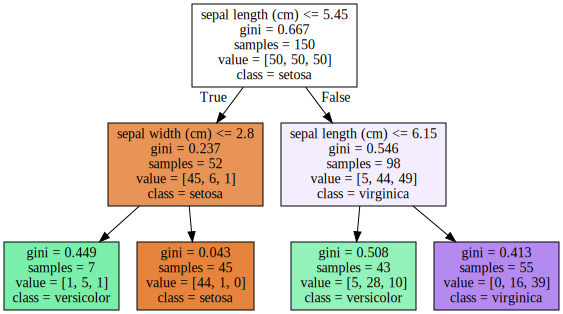

In [6]:
with open("./iris.dot") as f:
    dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

결정 경계선 그리기
--

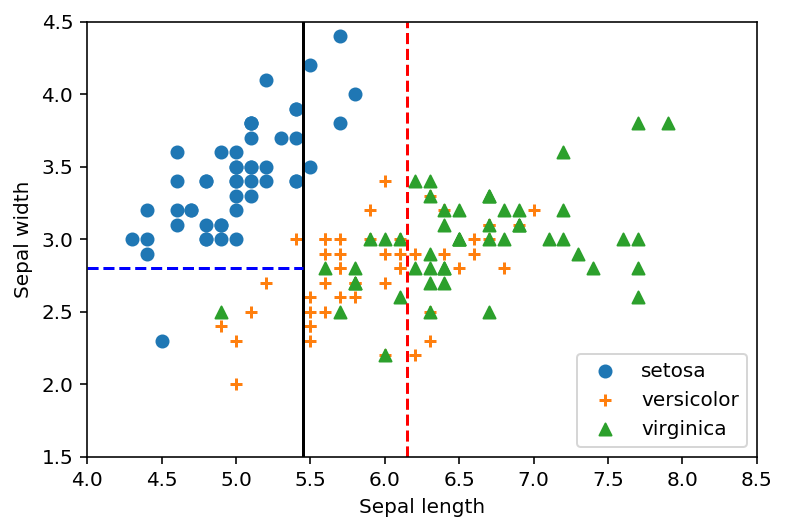

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') # 붉은색 점선


In [8]:
print(clf.predict([[5.5, 4]]))

[1]


In [9]:
print(clf.predict_proba([[5.5, 4]]))

[[0.11627907 0.65116279 0.23255814]]


## 유방암 분류

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer() 

In [12]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target) 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.916083916083916


In [14]:
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0172),
 ('smoothness error', 0.0024),
 ('compactness error', 0.012),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.0172),
 ('worst texture', 0.0396),
 ('worst perimeter', 0.6947),
 ('worst area', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst concave points', 0.1211),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

In [0]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })

In [16]:
df

,feature,importance
0,mean radius,0.000000
1,mean texture,0.041720
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.042647
8,mean symmetry,0.011405
9,mean fractal dimension,0.000000


In [17]:
df=df.sort_values('importance', ascending=False) 
print(df.head(20))

                    feature  importance
22          worst perimeter    0.694689
27     worst concave points    0.121068
7       mean concave points    0.042647
1              mean texture    0.041720
21            worst texture    0.039639
13               area error    0.017216
20             worst radius    0.017188
15        compactness error    0.012042
8             mean symmetry    0.011405
14         smoothness error    0.002385
23               worst area    0.000000
18           symmetry error    0.000000
24         worst smoothness    0.000000
25        worst compactness    0.000000
26          worst concavity    0.000000
28           worst symmetry    0.000000
19  fractal dimension error    0.000000
0               mean radius    0.000000
17     concave points error    0.000000
16          concavity error    0.000000


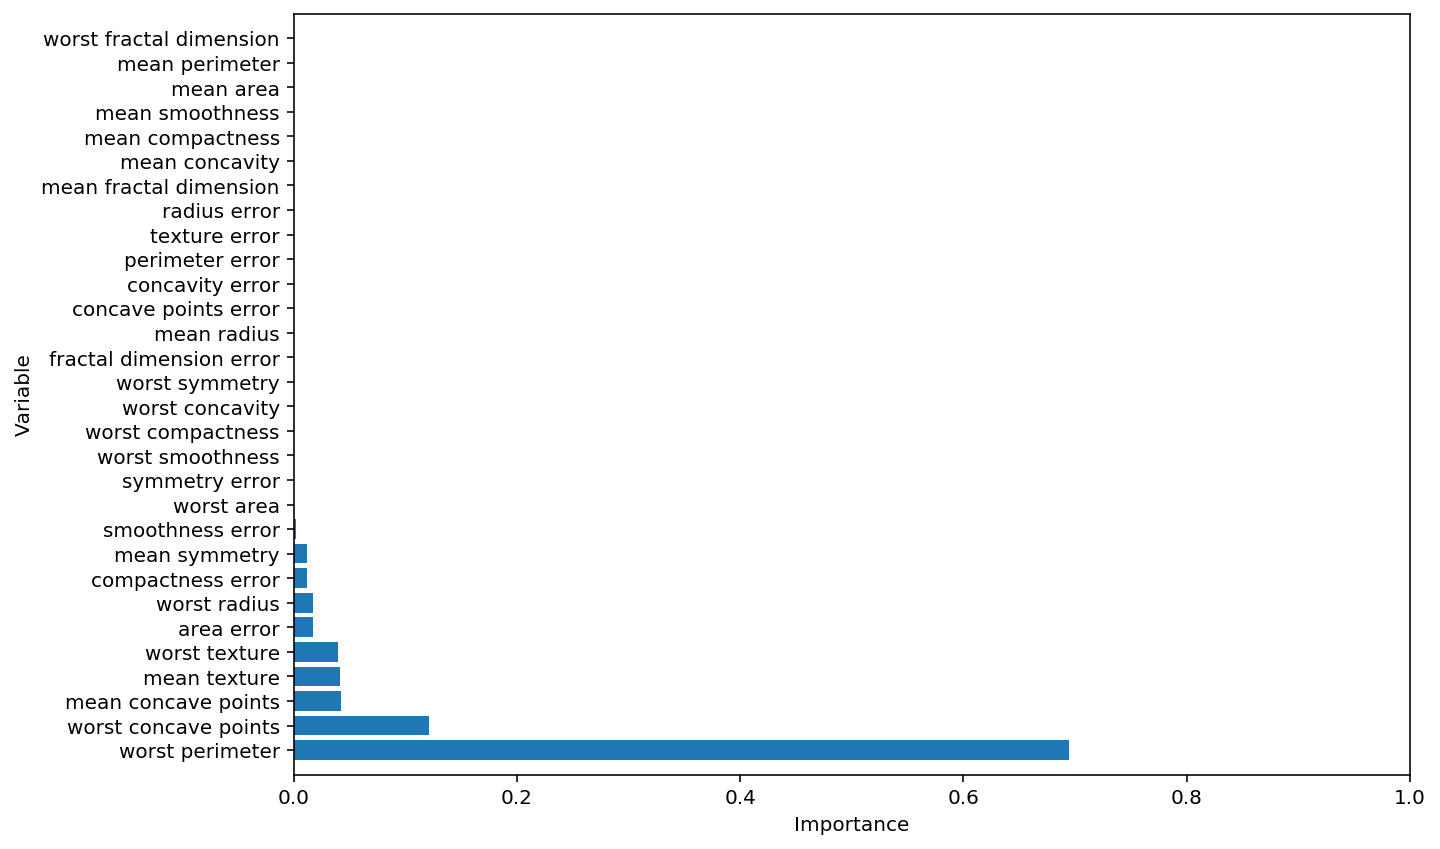

In [18]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()